In [1]:
# Initial imports
import pandas as pd
import os
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
from dotenv import load_dotenv
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/Users/soma/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Reading housing prices data
file_path = Path("../Resources/housing_prices_month_clean.csv")
housing_price_df = pd.read_csv(file_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
housing_price_df.sort_index(inplace=True)
housing_price_df.head(10)

,Region,Median Sale Price,Homes Sold,New Listings,Inventory,Days on Market,Days on Market MoM,Days on Market YoY
Date,,,,,,,,
2012-01-31,"Auburn, WA",188,81,118,447,107,38,10
2012-01-31,"Marysville, WA",180,78,93,285,65,12,-7
2012-01-31,"Brier, WA",540,7,5,26,147,71,38
2012-01-31,"Renton, WA",244,116,160,485,88,27,-14
2012-01-31,"Mercer Island, WA",863,12,40,105,88,3,-87
2012-01-31,"Tukwila, WA",122,15,17,60,98,-2,-29
2012-01-31,"Bothell, WA",314,117,155,339,74,-12,4
2012-01-31,"Redmond, WA",385,69,98,272,114,31,18
2012-01-31,"Mill Creek, WA",320,23,29,87,62,34,-35


In [3]:
housing_price_df['Region'] = housing_price_df['Region'].str.split(',', expand=True)[0]
housing_price_df.head()

,Region,Median Sale Price,Homes Sold,New Listings,Inventory,Days on Market,Days on Market MoM,Days on Market YoY
Date,,,,,,,,
2012-01-31,Auburn,188,81,118,447,107,38,10
2012-01-31,Marysville,180,78,93,285,65,12,-7
2012-01-31,Brier,540,7,5,26,147,71,38
2012-01-31,Renton,244,116,160,485,88,27,-14
2012-01-31,Mercer Island,863,12,40,105,88,3,-87


In [4]:
# Count nulls
housing_price_df_null = housing_price_df.isnull().sum()
housing_price_df_null

Region                0
Median Sale Price     0
Homes Sold            0
New Listings          0
Inventory             0
Days on Market        0
Days on Market MoM    0
Days on Market YoY    0
dtype: int64

In [5]:
housing_price_df['Inventory'] = housing_price_df['Inventory'].str.replace(",", "")
housing_price_df['Inventory'].head() 

Date
2012-01-31    447
2012-01-31    285
2012-01-31     26
2012-01-31    485
2012-01-31    105
Name: Inventory, dtype: object

In [6]:
#Convert `Close` from `object` to `float`.
housing_price_df['Inventory'] = housing_price_df['Inventory'].astype('int')
housing_price_df['Inventory']

housing_price_df.dtypes

Region                object
Median Sale Price      int64
Homes Sold            object
New Listings          object
Inventory              int64
Days on Market         int64
Days on Market MoM     int64
Days on Market YoY     int64
dtype: object

In [7]:
housing_price_df['Homes Sold'] = housing_price_df['Homes Sold'].str.replace(",", "")
housing_price_df['Homes Sold'] = housing_price_df['Homes Sold'].astype('int')
housing_price_df['Homes Sold']

housing_price_df.dtypes

Region                object
Median Sale Price      int64
Homes Sold             int64
New Listings          object
Inventory              int64
Days on Market         int64
Days on Market MoM     int64
Days on Market YoY     int64
dtype: object

In [8]:
housing_price_df['New Listings'] = housing_price_df['New Listings'].str.replace(",", "")
housing_price_df['New Listings'] = housing_price_df['New Listings'].astype('int')
housing_price_df['New Listings']

housing_price_df.dtypes

Region                object
Median Sale Price      int64
Homes Sold             int64
New Listings           int64
Inventory              int64
Days on Market         int64
Days on Market MoM     int64
Days on Market YoY     int64
dtype: object

In [9]:
housing_price_df.head()

,Region,Median Sale Price,Homes Sold,New Listings,Inventory,Days on Market,Days on Market MoM,Days on Market YoY
Date,,,,,,,,
2012-01-31,Auburn,188,81,118,447,107,38,10
2012-01-31,Marysville,180,78,93,285,65,12,-7
2012-01-31,Brier,540,7,5,26,147,71,38
2012-01-31,Renton,244,116,160,485,88,27,-14
2012-01-31,Mercer Island,863,12,40,105,88,3,-87


In [10]:
housing_price_df.to_csv('dashboard/housing_price_df.csv', index="Date")

In [11]:
housing_price_df.corr()

,Median Sale Price,Homes Sold,New Listings,Inventory,Days on Market,Days on Market MoM,Days on Market YoY
Median Sale Price,1.000000,-0.023168,-0.025732,-0.076468,-0.294333,0.015330,0.133827
Homes Sold,-0.023168,1.000000,0.971352,0.921674,-0.082790,0.002838,0.017621
New Listings,-0.025732,0.971352,1.000000,0.916346,-0.082074,-0.011253,0.016426
Inventory,-0.076468,0.921674,0.916346,1.000000,0.000695,0.004472,0.009068
Days on Market,-0.294333,-0.082790,-0.082074,0.000695,1.000000,0.338288,0.195358
Days on Market MoM,0.015330,0.002838,-0.011253,0.004472,0.338288,1.000000,0.350020
Days on Market YoY,0.133827,0.017621,0.016426,0.009068,0.195358,0.350020,1.000000


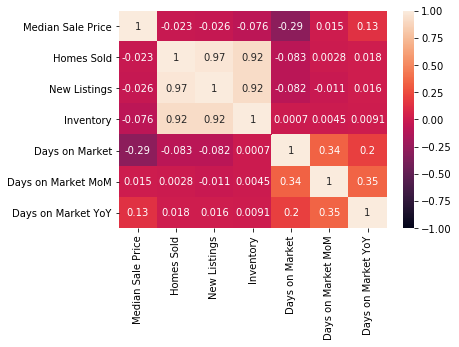

In [12]:
corr_plot = sns.heatmap(housing_price_df.corr(), vmin=-1, vmax=1, annot=True)

Asset Correlation

In [13]:
# Load the asset price data
file_path = Path("../Resources/Asset_Prices_Month.csv") 
asset_data_df = pd.read_csv(file_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
asset_data_df.head()

,AMZN,BA,MSFT,BTC,Gold,30 T-Bond
Date,,,,,,
2012-02-29,179.69,74.95,31.74,NaN,1716.6,3.08
2012-03-31,202.51,74.37,32.26,NaN,1674.3,3.35
2012-04-30,231.90,76.80,32.02,NaN,1666.5,3.12
2012-05-31,212.91,69.61,29.19,NaN,1564.2,2.67
2012-06-30,228.35,74.30,30.59,NaN,1604.2,2.76


In [14]:
asset_data_df.to_csv('dashboard/asset_data_df.csv')

In [15]:
asset_data_df.dtypes

AMZN         float64
BA           float64
MSFT         float64
BTC          float64
Gold         float64
30 T-Bond    float64
dtype: object

In [16]:
asset_returns = asset_data_df.pct_change()
asset_returns.head()

,AMZN,BA,MSFT,BTC,Gold,30 T-Bond
Date,,,,,,
2012-02-29,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-31,0.126996,-0.007738,0.016383,NaN,-0.024642,0.087662
2012-04-30,0.145129,0.032674,-0.007440,NaN,-0.004659,-0.068657
2012-05-31,-0.081889,-0.093620,-0.088382,NaN,-0.061386,-0.144231
2012-06-30,0.072519,0.067375,0.047962,NaN,0.025572,0.033708


In [17]:
# Read the housing price aggregate data, set the `Date` as the index
file_path = Path("../Resources/housing_prices_month_aggregate_clean.csv") 
housing_data_df = pd.read_csv(file_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
housing_data_df.head()

,Median Sale Price
Date,
2012-02-29,309511.1111
2012-03-31,313230.5556
2012-04-30,325841.1111
2012-05-31,335194.4444
2012-06-30,331952.2222


In [18]:
# Use the `concat` function to combine the two DataFrames by matching indexes (or in this case `Date`)
combined_df_asset = pd.concat([asset_data_df, housing_data_df], axis='columns', join='inner')
combined_df_asset.head()

,AMZN,BA,MSFT,BTC,Gold,30 T-Bond,Median Sale Price
Date,,,,,,,
2012-02-29,179.69,74.95,31.74,NaN,1716.6,3.08,309511.1111
2012-03-31,202.51,74.37,32.26,NaN,1674.3,3.35,313230.5556
2012-04-30,231.90,76.80,32.02,NaN,1666.5,3.12,325841.1111
2012-05-31,212.91,69.61,29.19,NaN,1564.2,2.67,335194.4444
2012-06-30,228.35,74.30,30.59,NaN,1604.2,2.76,331952.2222


In [19]:
combined_df_asset['BTC'].fillna(0, inplace=True)

In [20]:
combined_df_asset.to_csv('dashboard/combined_df_asset.csv')

In [21]:
housing_returns = housing_data_df.pct_change()
housing_returns.head()

,Median Sale Price
Date,
2012-02-29,NaN
2012-03-31,0.012017
2012-04-30,0.040260
2012-05-31,0.028705
2012-06-30,-0.009673


In [22]:
all_returns = pd.concat([asset_returns, housing_returns], axis="columns", join="inner")
all_returns.head()

,AMZN,BA,MSFT,BTC,Gold,30 T-Bond,Median Sale Price
Date,,,,,,,
2012-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-31,0.126996,-0.007738,0.016383,NaN,-0.024642,0.087662,0.012017
2012-04-30,0.145129,0.032674,-0.007440,NaN,-0.004659,-0.068657,0.040260
2012-05-31,-0.081889,-0.093620,-0.088382,NaN,-0.061386,-0.144231,0.028705
2012-06-30,0.072519,0.067375,0.047962,NaN,0.025572,0.033708,-0.009673


In [23]:
all_returns.to_csv('dashboard/all_returns.csv', index="Date")

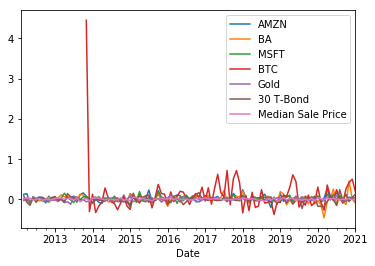

In [24]:
all_returns.plot.line()

In [25]:
# Use the `std` function and multiply by the square root of the number of trading days in a year to get annualized volatility
volatility = all_returns.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

Median Sale Price    0.378814
Gold                 0.654730
MSFT                 0.923888
30 T-Bond            1.215648
AMZN                 1.298244
BA                   1.571436
BTC                  8.375357
dtype: float64

In [26]:
# Use the `corr` function to calculate correlations for each stock pair
correlation = all_returns.corr()
correlation

,AMZN,BA,MSFT,BTC,Gold,30 T-Bond,Median Sale Price
AMZN,1.000000,0.282400,0.470951,0.131068,0.059120,0.056182,-0.013569
BA,0.282400,1.000000,0.273241,0.085469,-0.104781,0.217059,0.130730
MSFT,0.470951,0.273241,1.000000,0.171341,-0.138826,0.239857,0.128542
BTC,0.131068,0.085469,0.171341,1.000000,-0.098619,0.055994,0.137178
Gold,0.059120,-0.104781,-0.138826,-0.098619,1.000000,-0.305347,-0.086139
30 T-Bond,0.056182,0.217059,0.239857,0.055994,-0.305347,1.000000,0.080675
Median Sale Price,-0.013569,0.130730,0.128542,0.137178,-0.086139,0.080675,1.000000


In [27]:
correlation.to_csv('dashboard/correlation.csv', index="Date")

In [28]:
correlation.dtypes

AMZN                 float64
BA                   float64
MSFT                 float64
BTC                  float64
Gold                 float64
30 T-Bond            float64
Median Sale Price    float64
dtype: object

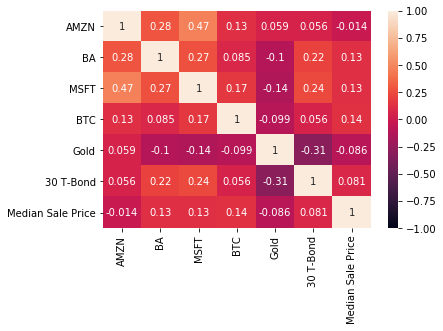

In [29]:
# Create a heatmap from the correlation values
corr2_plot = sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)

In [30]:
correlation_2 = combined_df_asset.corr()
correlation_2

,AMZN,BA,MSFT,BTC,Gold,30 T-Bond,Median Sale Price
AMZN,1.000000,0.590124,0.982338,0.848446,0.482097,-0.699015,0.918371
BA,0.590124,1.000000,0.542075,0.499996,-0.137401,-0.116423,0.744053
MSFT,0.982338,0.542075,1.000000,0.850928,0.522869,-0.751674,0.889495
BTC,0.848446,0.499996,0.850928,1.000000,0.479965,-0.565386,0.770430
Gold,0.482097,-0.137401,0.522869,0.479965,1.000000,-0.607293,0.196240
30 T-Bond,-0.699015,-0.116423,-0.751674,-0.565386,-0.607293,1.000000,-0.599747
Median Sale Price,0.918371,0.744053,0.889495,0.770430,0.196240,-0.599747,1.000000


In [31]:
correlation_2.to_csv('dashboard/correlation_2.csv')

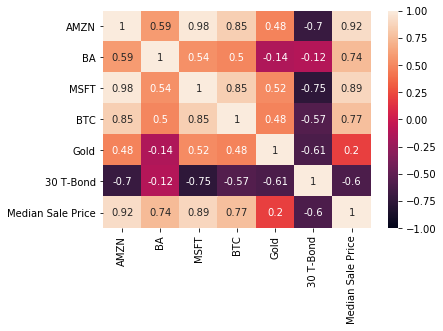

In [32]:
corr3_plot = sns.heatmap(correlation_2, vmin=-1, vmax=1, annot=True)

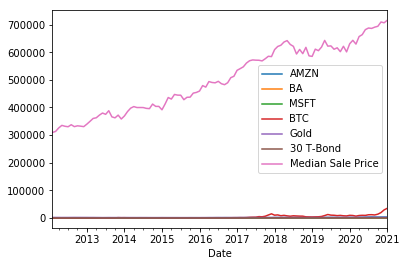

In [33]:
combined_df_asset.plot()

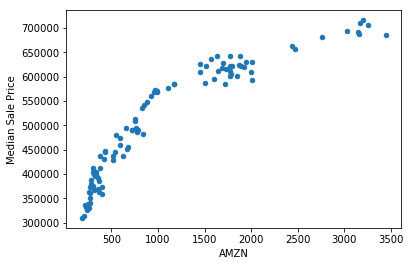

In [34]:
combined_df_asset.plot(kind='scatter', x='AMZN', y='Median Sale Price')

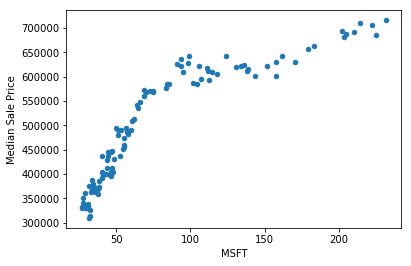

In [35]:
combined_df_asset.plot(kind='scatter', x='MSFT', y='Median Sale Price')

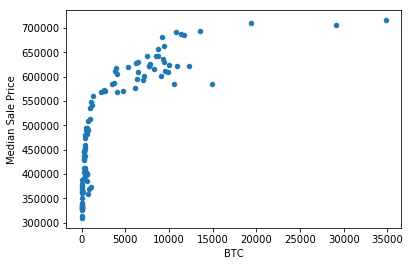

In [36]:
combined_df_asset.plot(kind='scatter', x='BTC', y='Median Sale Price')

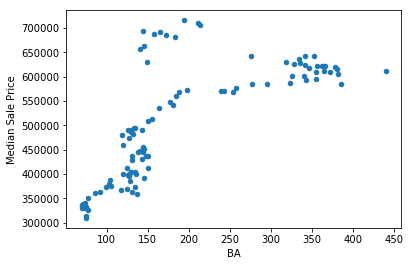

In [37]:
combined_df_asset.plot(kind='scatter', x='BA', y='Median Sale Price')

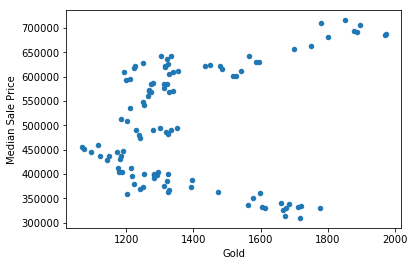

In [38]:
combined_df_asset.plot(kind='scatter', x='Gold', y='Median Sale Price')

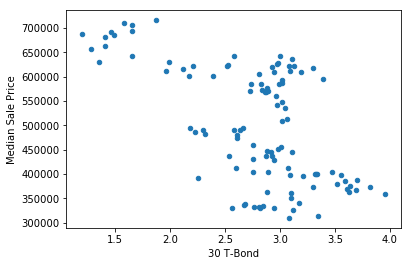

In [39]:
combined_df_asset.plot(kind='scatter', x='30 T-Bond', y='Median Sale Price')